# The Sparks Foundation internship
# Data Science and Business Analytics
# Name-Srideep Bhattacharya
# From the given dataset,find optimal number of clusters and represent it visually.

# Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns         
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Iris.csv") #Reading dataset

In [3]:
df.shape #Finding dimensions

(150, 6)

In [4]:
df.head(10) #First 10 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.dtypes #Datatype of Attributes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
df.isnull().sum() #Checking for null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df['Species'].nunique #Unique values of species

<bound method IndexOpsMixin.nunique of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object>

In [8]:
df.info() #Some details about variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.describe() #Calculating certain quantities

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data analysis to draw insights

<AxesSubplot:>

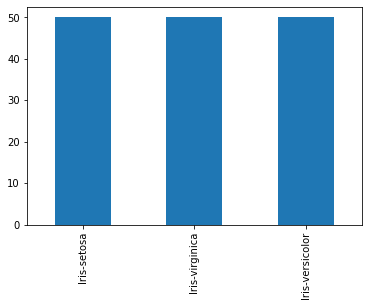

In [10]:
df['Species'].value_counts().sort_values().plot.bar() #Visualizing no. of observations of each species

In [11]:
**df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

<AxesSubplot:xlabel='SepalLengthCm'>

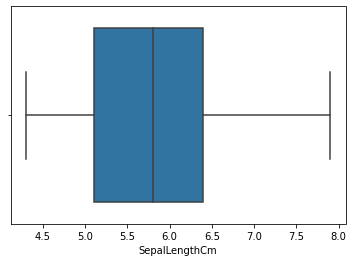

In [12]:
sns.boxplot(x=df['SepalLengthCm']) #Box plot for seeing range of values and detecting outliers

In [13]:
np.mean(df['SepalLengthCm'])

5.843333333333335

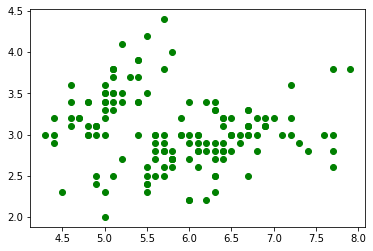

In [14]:
plt.scatter(x=df['SepalLengthCm'],y=df['SepalWidthCm'],color='green')
#Plot to find relation if any.

<AxesSubplot:xlabel='SepalWidthCm'>

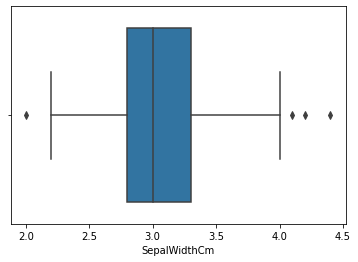

In [15]:
sns.boxplot(x=df['SepalWidthCm'])#Box plot for seeing range of values and detecting outliers

<AxesSubplot:>

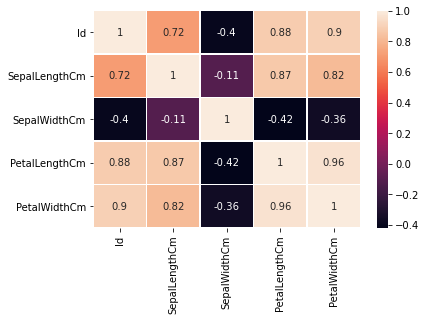

In [16]:
sns.heatmap(df.corr(),annot=True,linewidths=0.5) #Correlation visualisation

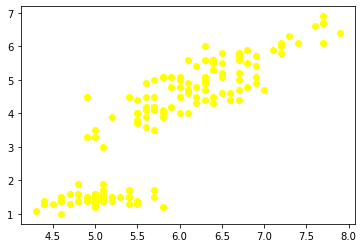

In [17]:
plt.scatter(x=df['SepalLengthCm'],y=df['PetalLengthCm'],color='yellow')
#Good coorelation on seeing the plot

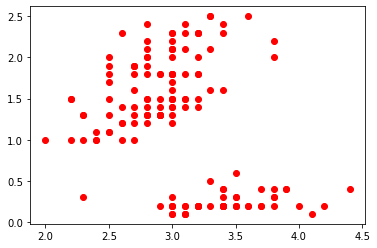

In [18]:
plt.scatter(x=df['SepalWidthCm'],y=df['PetalWidthCm'],color='red')
#No conclusion drawn

<AxesSubplot:xlabel='PetalLengthCm'>

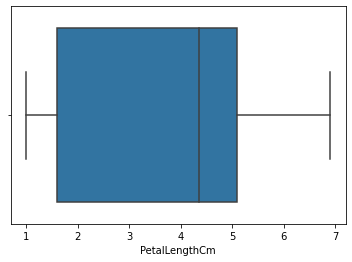

In [19]:
sns.boxplot(x=df['PetalLengthCm'])#Box plot for seeing range of values and detecting outliers

<AxesSubplot:xlabel='PetalWidthCm'>

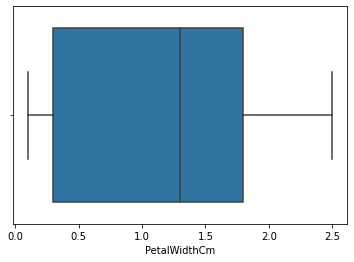

In [20]:
sns.boxplot(x=df['PetalWidthCm'])#Box plot for seeing range of values and detecting outliers

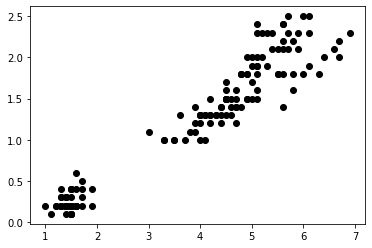

In [21]:
plt.scatter(x=df['PetalLengthCm'],y=df['PetalWidthCm'],color='black')
#Heavily coorelated variables with CORR=0.96

In [22]:
x=df.drop(columns=['Species','Id'])
x.shape
#Categorical variables dropped as they can't help in analysis

(150, 4)

In [23]:
y=x.values
y

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Calculating WCSS through elbow method to find min wcss wrt cluster frequency(1-10)

In [24]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=1800,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

In [25]:
wcss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 46.535582051282034,
 38.93873974358975,
 34.190687924796634,
 29.90537429982511,
 27.927882157034986,
 25.955497086247092]

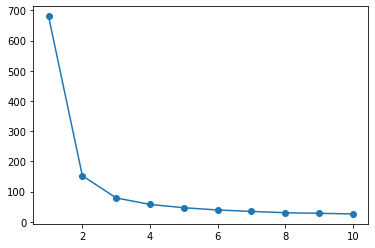

In [26]:
plt.plot(range(1,11),wcss,marker='o')

# K-Means Clustering

In [27]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 1800,n_init=10,random_state =0)  #Creating our model and training it on our data
y_kmeans = kmeans.fit_predict(x)

In [28]:
y_kmeans #Predicted cluster values for each row

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

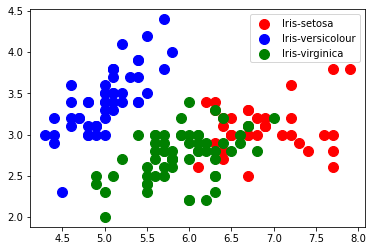

In [29]:
plt.scatter(y[y_kmeans == 0, 0], y[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(y[y_kmeans == 1, 0], y[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(y[y_kmeans == 2, 0], y[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')
plt.legend()
#Cluster visualisation

# The optimal number of clusters is 3. This is an unsupervised ML problem where we grouped our data on basis of flower species.